
--- FIRST 5 ROWS ---
                 Stadium  AvgScore  PaceWicket%  SpinWicket%  BoundaryRate
0               Wankhede       185           55           45           8.2
1            Chinnaswamy       200           60           40           9.1
2                Chepauk       150           38           62           6.5
3           Eden Gardens       175           72           28           7.5
4  Narendra Modi Stadium       165           68           32           7.2

--- AFTER CLEANING ---
                 Stadium  AvgScore  PaceWicket%  SpinWicket%  BoundaryRate
0               Wankhede       185           55           45           8.2
1            Chinnaswamy       200           60           40           9.1
2                Chepauk       150           38           62           6.5
3           Eden Gardens       175           72           28           7.5
4  Narendra Modi Stadium       165           68           32           7.2

--- FINAL RESULT ---
                          Stadiu

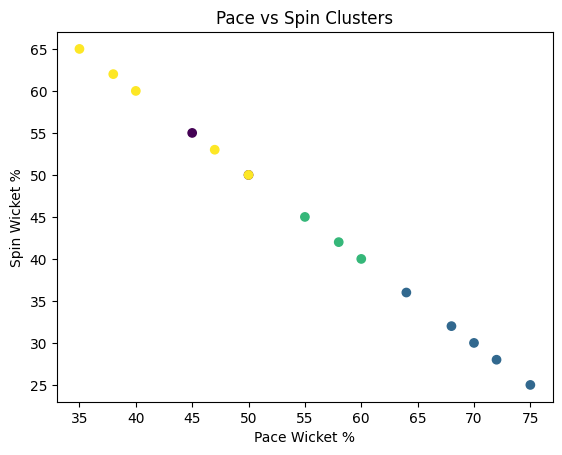

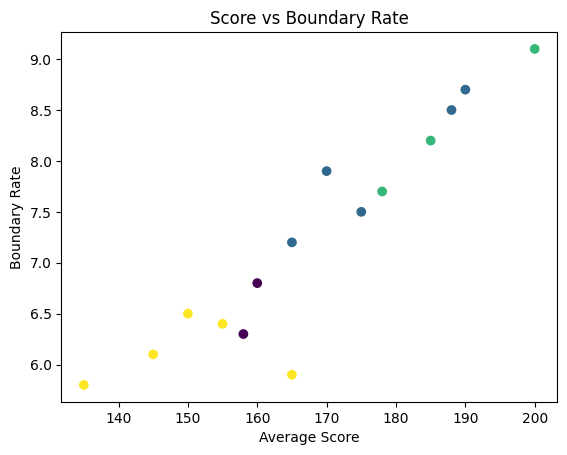


Saved as pitch_clustered_output.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load CSV
df = pd.read_csv(r"/stadium_pitch_data.csv.csv")
print("\n--- FIRST 5 ROWS ---")
print(df.head())

# CLEAN NUMERIC COLUMNS

numeric_cols = ["AvgScore", "PaceWicket%", "SpinWicket%", "BoundaryRate"]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df[col].fillna(df[col].mean())

print("\n--- AFTER CLEANING ---")
print(df.head())

# FEATURE MATRIX

X = df[numeric_cols]

# SCALE DATA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-MEANS (4 CLUSTERS)

kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Meaningful names
cluster_names = {
    0: "Batting Paradise",
    1: "Pacer's Heaven",
    2: "Spinner's Delight",
    3: "Unpredictable Pitch"
}

df["Pitch_Type"] = df["Cluster"].map(cluster_names)

print("\n--- FINAL RESULT ---")
print(df[["Stadium", "Pitch_Type"]])

# VISUALIZATION 1: Pace vs Spin

plt.scatter(df["PaceWicket%"], df["SpinWicket%"], c=df["Cluster"])
plt.xlabel("Pace Wicket %")
plt.ylabel("Spin Wicket %")
plt.title("Pace vs Spin Clusters")
plt.show()

# VISUALIZATION 2: Avg Score vs Boundary Rate

plt.scatter(df["AvgScore"], df["BoundaryRate"], c=df["Cluster"])
plt.xlabel("Average Score")
plt.ylabel("Boundary Rate")
plt.title("Score vs Boundary Rate")
plt.show()

# ---------------------------
# SAVE OUTPUT
# ---------------------------
df.to_csv("pitch_clustered_output.csv", index=False)
print("\nSaved as pitch_clustered_output.csv")


